In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv("../../dataset/pompa-v3.csv")

In [4]:
df.head()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,temp,flow,pressure_left,pressure_right
0,1684560621135183100,718.0,166.0,434.0,495.0,270.0,218.0,0.0,28.06,107.13,0.2,0.07
1,1684560622131858000,718.0,164.0,436.0,495.0,270.0,217.0,0.0,28.30,107.13,0.2,0.07
2,1684560623129414500,718.0,168.0,437.0,494.0,270.0,219.0,0.0,28.42,106.77,0.2,0.08
3,1684560624139432200,719.0,167.0,435.0,497.0,273.0,219.0,0.0,28.18,107.87,0.2,0.08
4,1684560625134896100,720.0,169.0,434.0,504.0,271.0,218.0,0.0,28.06,110.43,0.2,0.07


In [5]:
df.describe()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,temp,flow,pressure_left,pressure_right
count,2.202500e+04,22025.000000,22025.000000,22025.000000,22025.000000,22025.000000,22025.000000,22025.000000,22025.000000,22025.000000,22025.000000,22025.000000
mean,1.684572e+18,719.314415,742.394779,442.153371,505.748059,276.213167,221.393871,5.253104,29.024021,111.095602,0.209475,0.082386
std,6.365591e+12,1.863749,80.547978,7.931731,10.568921,5.154753,4.147810,0.782697,0.935724,3.002765,0.008810,0.007247
min,1.684561e+18,714.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-23.130000,0.000000,0.000000,0.000000
25%,1.684566e+18,718.000000,735.000000,440.000000,501.000000,274.000000,220.000000,5.180000,28.770000,109.330000,0.200000,0.080000
50%,1.684572e+18,719.000000,763.000000,443.000000,506.000000,276.000000,221.000000,5.450000,29.120000,111.170000,0.210000,0.080000
75%,1.684577e+18,720.000000,781.000000,445.000000,510.000000,278.000000,223.000000,5.630000,29.360000,112.640000,0.210000,0.090000
max,1.684583e+18,728.000000,822.000000,452.000000,531.000000,289.000000,233.000000,6.030000,30.180000,120.340000,0.240000,0.110000


In [6]:
print(len(df))

22025


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

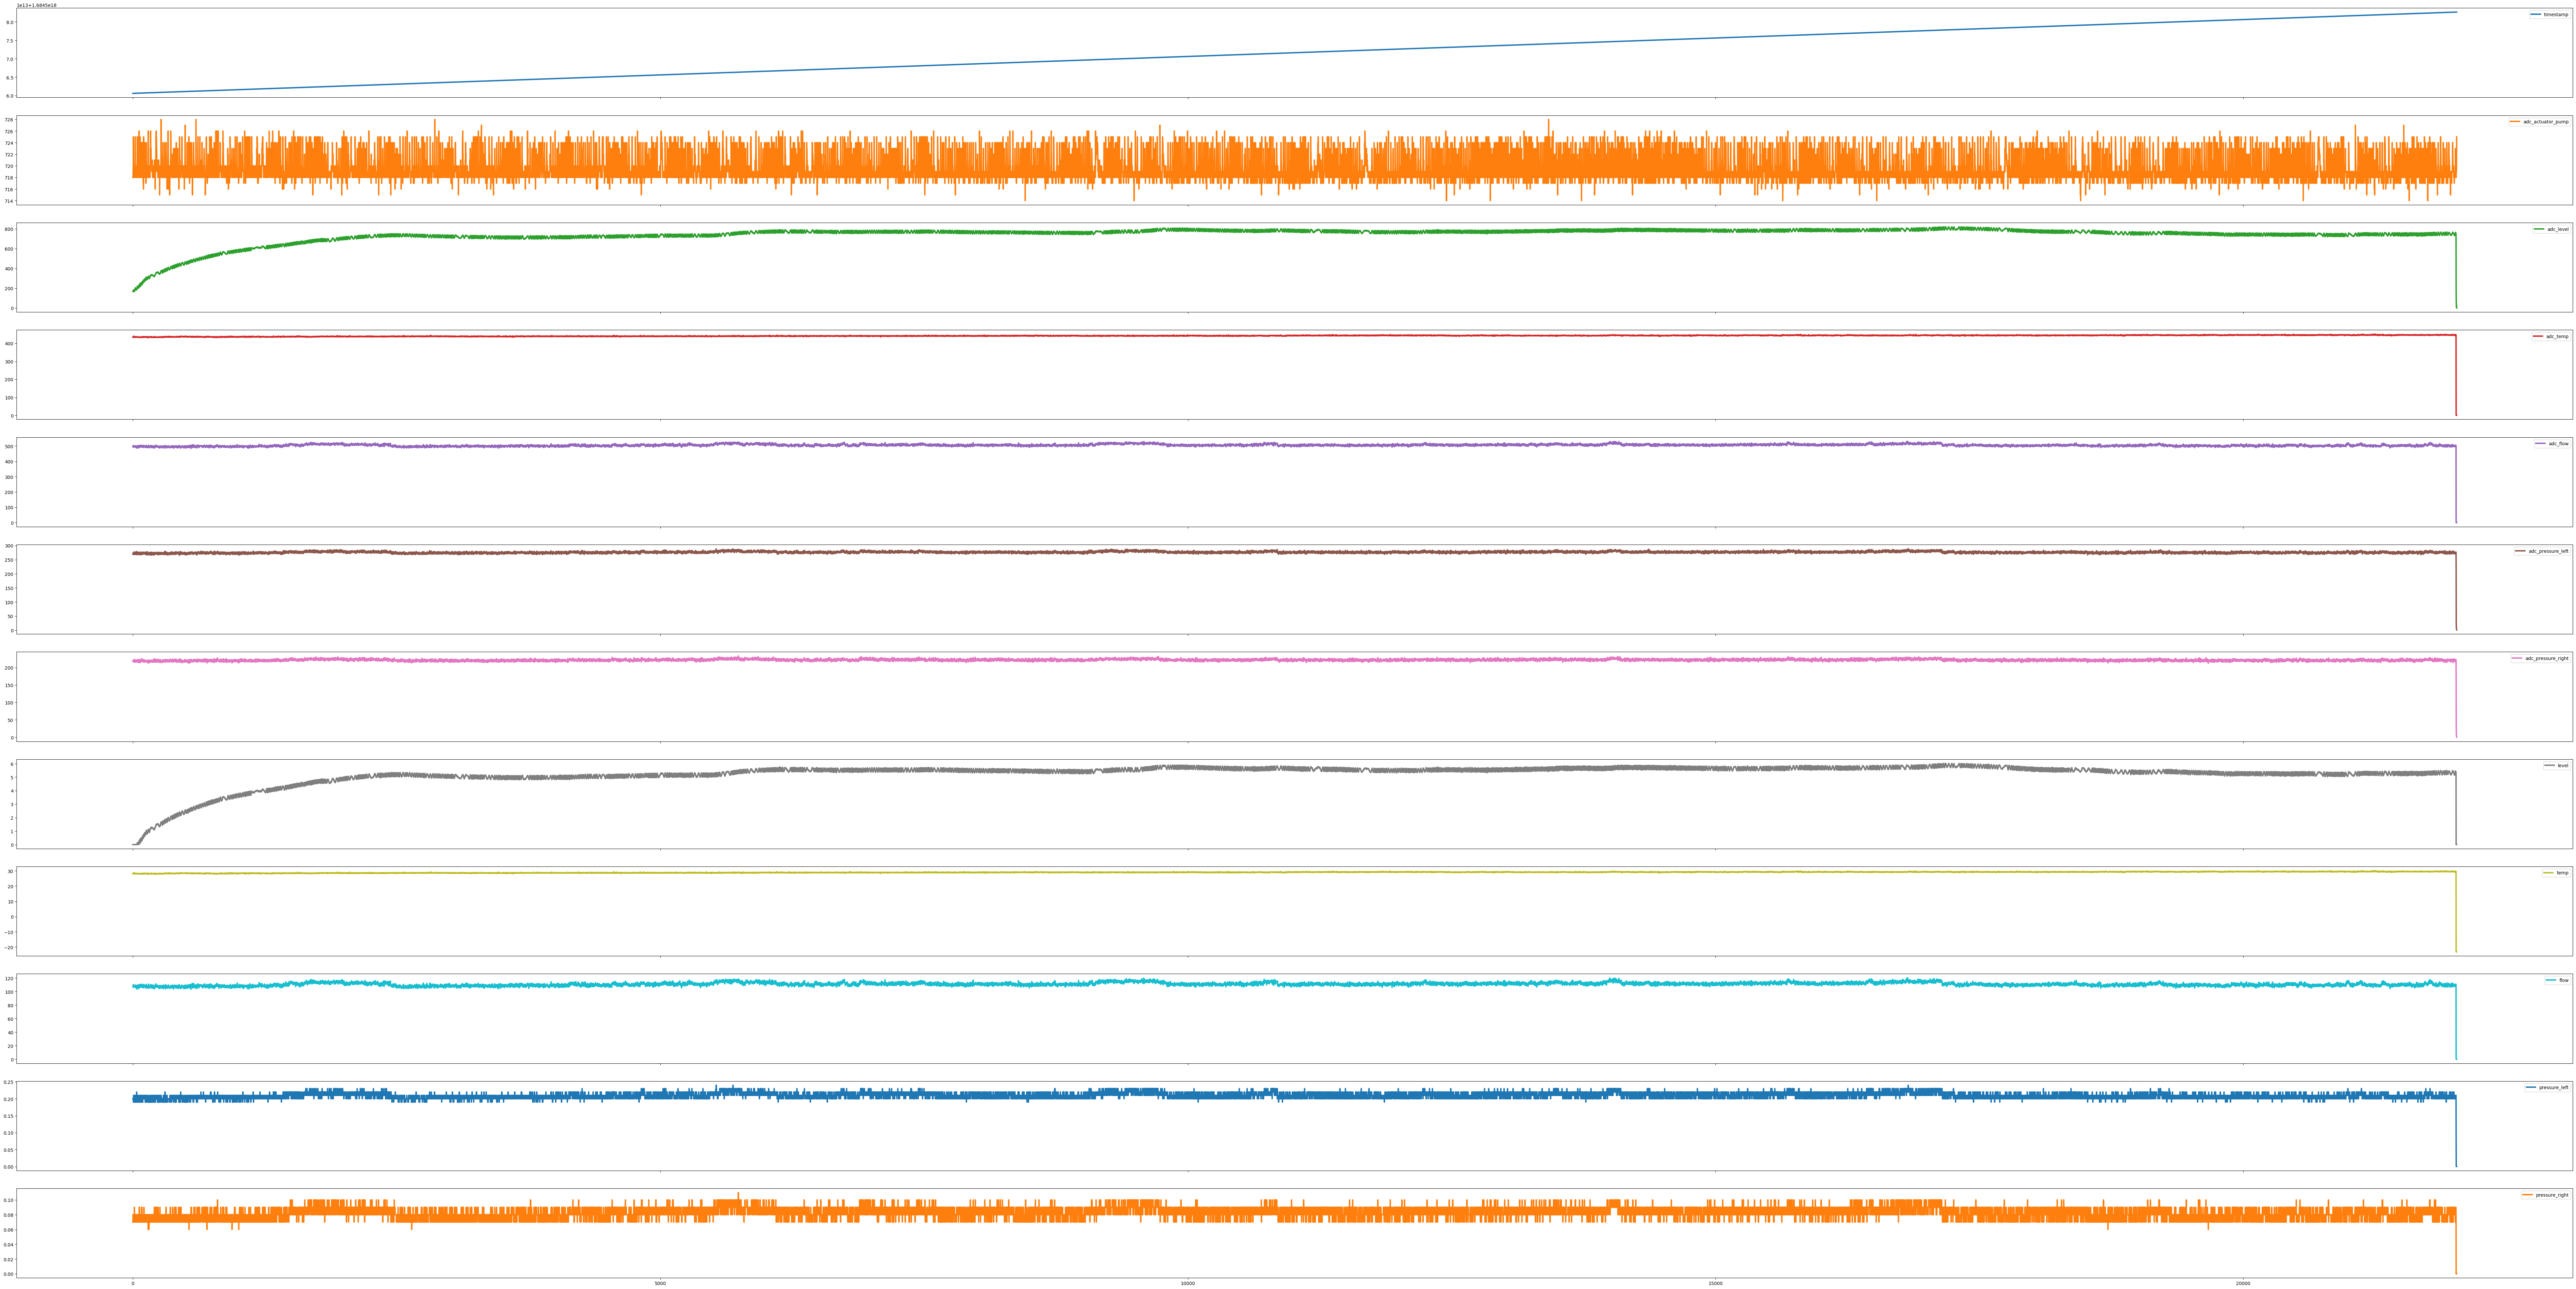

In [7]:
# df["level"].plot()

df.plot(subplots=True, figsize=(100, 50), linewidth=3)

<Axes: >

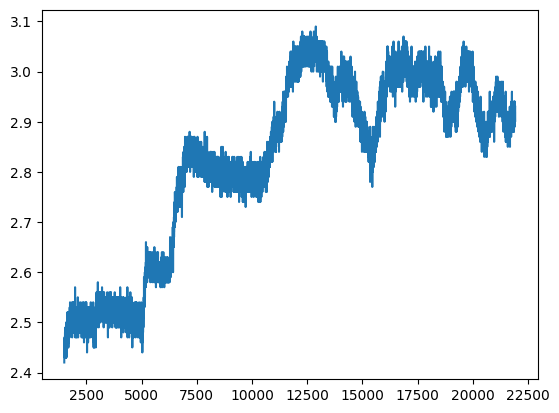

In [31]:
df["level"][1500:].plot()

In [37]:
df = df[1500:]
n = len(df)
train_df = df[0:int(n*0.8)]
test_df = df[int(n*0.8):]

In [41]:
features_considered = []
for column in df.columns:
  ks_result = stats.ks_2samp(train_df[column],test_df[column])
  print(column, ks_result)
  if (ks_result.statistic < 0.2):
    features_considered.append(column)

print(features_considered)

timestamp KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1683013574341574000, statistic_sign=1)
adc_actuator_pump KstestResult(statistic=0.1764201762977473, pvalue=2.061377783390628e-89, statistic_location=774.0, statistic_sign=-1)
adc_level KstestResult(statistic=0.5817213516160626, pvalue=0.0, statistic_location=497.0, statistic_sign=1)
adc_temp KstestResult(statistic=0.844086679725759, pvalue=0.0, statistic_location=446.0, statistic_sign=1)
adc_flow KstestResult(statistic=0.07394711067580803, pvalue=5.556476582843971e-16, statistic_location=586.0, statistic_sign=1)
adc_pressure_left KstestResult(statistic=0.15126101860920665, pvalue=1.0031471146896968e-65, statistic_location=360.0, statistic_sign=1)
adc_pressure_right KstestResult(statistic=0.19760039177277178, pvalue=2.944600724580984e-112, statistic_location=264.0, statistic_sign=1)
level KstestResult(statistic=0.5817213516160626, pvalue=0.0, statistic_location=2.85, statistic_sign=1)
temp KstestResult(statistic=0.8440